# Temporal view of Henry VIII's marriages

In [1]:
# Data

wives = [
    {'name': "Catherine of Aragon", 'marriage_start_date': "1509-06-11", 'marriage_end_date': "1533-05-23", 'pie_chart_colour': '#a6cee3'},
    # Henry had already secretly exchanged wedding vows with Anne on 1532-11-14 (before Cranmer ruled the 
    # marriage to Catherine null and void). However, in order to avoid an awkward overlap, we go with a 
    # marriage_start_date for Anne of 1533-05-28, which is when Cranmer pronounced the King legally 
    # married to Anne.
    {'name': "Anne Boleyn", 'marriage_start_date': "1533-05-28", 'marriage_end_date': "1536-05-17", 'pie_chart_colour': '#1f78b4'},
    {'name': "Jane Seymour", 'marriage_start_date': "1536-05-30", 'marriage_end_date': "1537-10-24", 'pie_chart_colour': '#b2df8a'},
    {'name': "Anne of Cleves", 'marriage_start_date': "1540-01-06", 'marriage_end_date': "1540-07-12", 'pie_chart_colour': '#33a02c'},
    {'name': "Catherine Howard", 'marriage_start_date': "1540-07-28", 'marriage_end_date': "1542-02-13", 'pie_chart_colour': '#fb9a99'},
    {'name': "Catherine Parr", 'marriage_start_date': "1543-07-12", 'marriage_end_date': "1547-01-28", 'pie_chart_colour': '#e31a1c'}
]


In [2]:
# Process the data

from datetime import date
import re

def parse_dates(obj):
    iso_date_regex = re.compile(r"\d{4}-\d{2}-\d{2}")
    for key, value in obj.items():
        if key.endswith('_date') and isinstance(value, str) and iso_date_regex.match(value):
            obj[key] = date.fromisoformat(value)

for wife in wives:
    parse_dates(wife)

# Sanity check the data
for i, wife in enumerate(wives):
    # For each wife, marriage_start_date should be before marriage_end_date
    assert wife['marriage_start_date'] < wife['marriage_end_date'], f"{wife['name']}: marriage start date is not before end date"

    # Marriage periods should be consecutive and non-overlapping
    if i > 0:
        prev_wife = wives[i-1]
        assert prev_wife['marriage_end_date'] < wife['marriage_start_date'], f"{wife['name']}: marriage start date overlaps with previous marriage"

print("Data validation successful!")

Data validation successful!


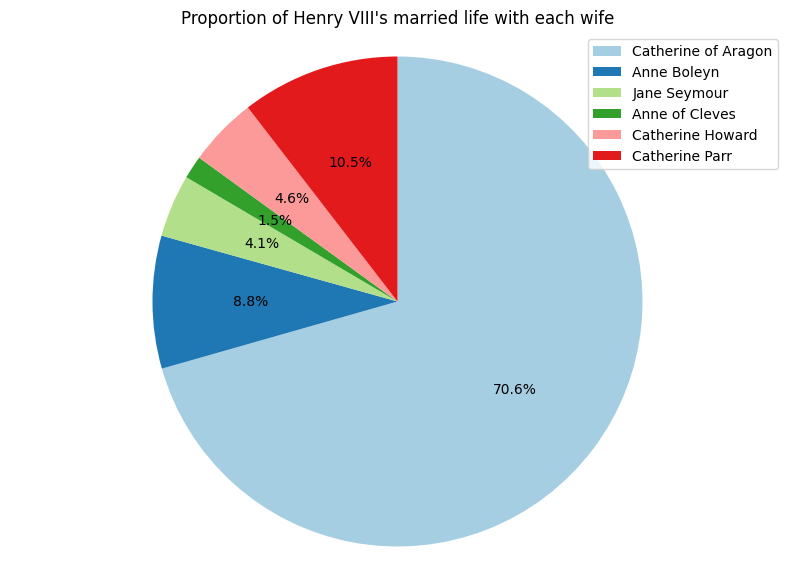

In [ ]:
# Create a pie chart depicting the proportion of Henry VIII's married life with each wife

import matplotlib.pyplot as plt

durations = [(wife['marriage_end_date'] - wife['marriage_start_date']).days for wife in wives]
labels = [wife['name'] for wife in wives]
colours = [wife['pie_chart_colour'] for wife in wives]

plt.figure(figsize=(10, 7))
plt.pie(durations, autopct='%1.1f%%', startangle=90, colors=colours, counterclock=False)
plt.legend(labels, loc="best")
plt.title("Proportion of Henry VIII's married life with each wife")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()